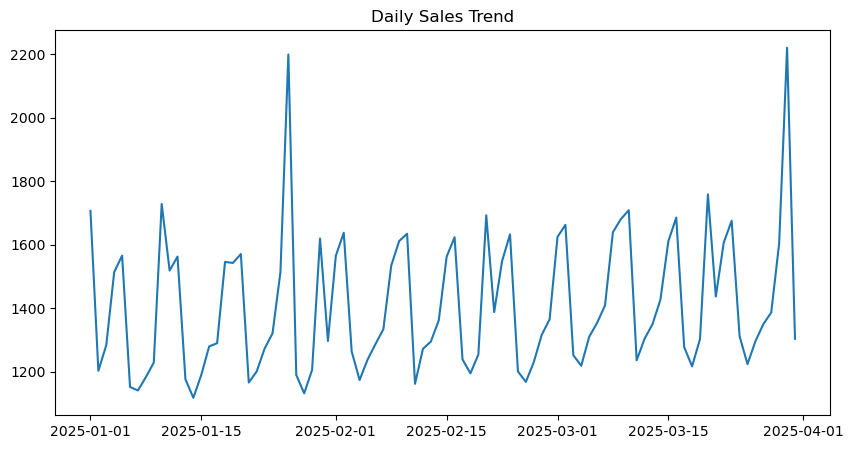

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sales = pd.read_csv("../data/raw/sales.csv")
sales['date'] = pd.to_datetime(sales['date'])

# Daily Sales Trend
daily_sales = sales.groupby('date')['units_sold'].sum()

plt.figure(figsize=(10,5))
plt.plot(daily_sales)
plt.title("Daily Sales Trend")
plt.show()


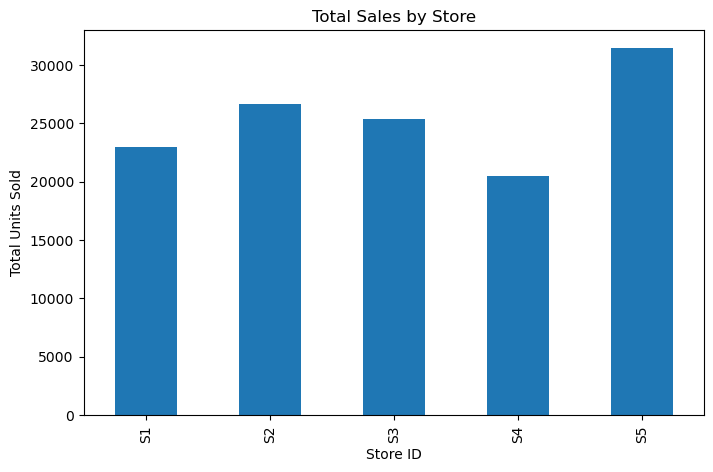

In [2]:
store_sales = sales.groupby('store_id')['units_sold'].sum()

plt.figure(figsize=(8,5))
store_sales.plot(kind='bar')
plt.title("Total Sales by Store")
plt.xlabel("Store ID")
plt.ylabel("Total Units Sold")
plt.show()

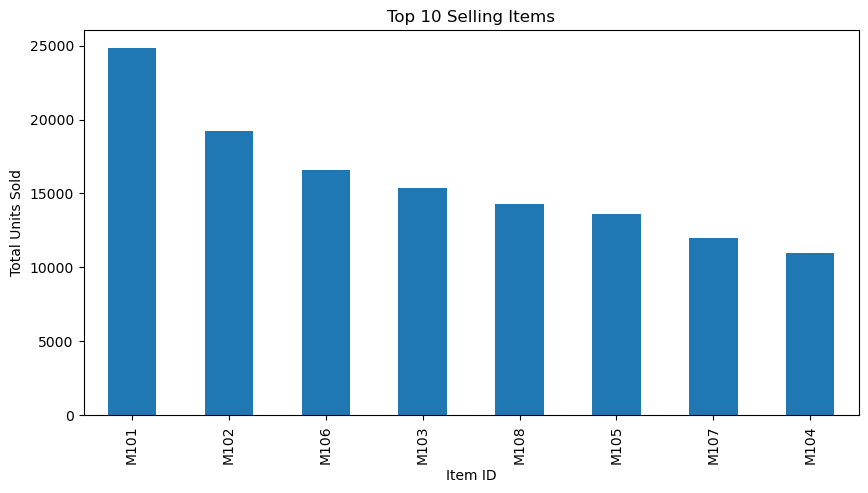

In [3]:
item_sales = sales.groupby('item_id')['units_sold'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
item_sales.plot(kind='bar')
plt.title("Top 10 Selling Items")
plt.xlabel("Item ID")
plt.ylabel("Total Units Sold")
plt.show()

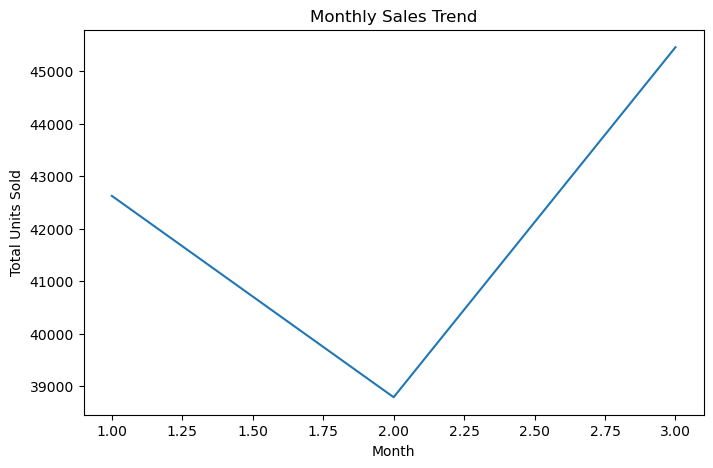

In [4]:
sales['month'] = sales['date'].dt.month
monthly_sales = sales.groupby('month')['units_sold'].sum()

plt.figure(figsize=(8,5))
monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Units Sold")
plt.show()

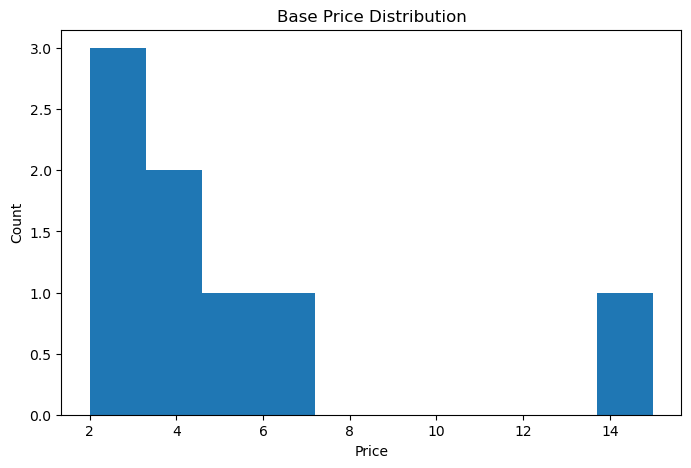

In [7]:
items = pd.read_csv("../data/raw/items.csv")
merged = sales.merge(items, on='item_id')
plt.figure(figsize=(8,5))
plt.hist(items['base_price'], bins=10)
plt.title("Base Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [8]:
calendar = pd.read_csv("../data/raw/calendar.csv")
calendar['date'] = pd.to_datetime(calendar['date'])

merged = sales.merge(calendar, on='date')

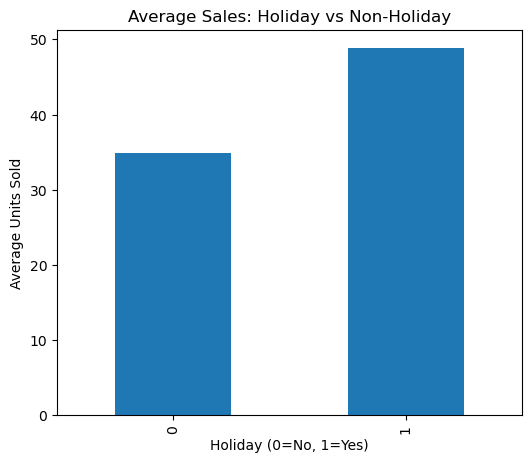

In [9]:
holiday_sales = merged.groupby('is_holiday')['units_sold'].mean()

plt.figure(figsize=(6,5))
holiday_sales.plot(kind='bar')
plt.title("Average Sales: Holiday vs Non-Holiday")
plt.xlabel("Holiday (0=No, 1=Yes)")
plt.ylabel("Average Units Sold")
plt.show()

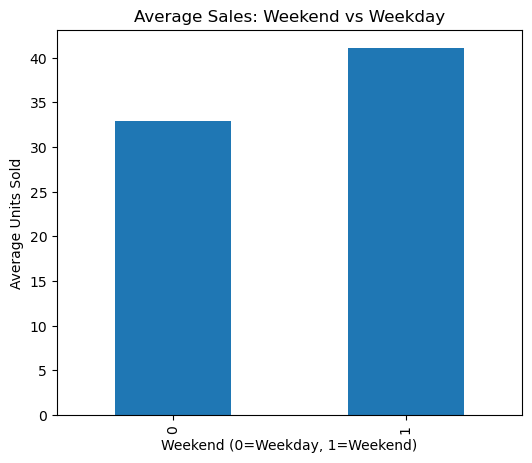

In [10]:
weekend_sales = merged.groupby('is_weekend')['units_sold'].mean()

plt.figure(figsize=(6,5))
weekend_sales.plot(kind='bar')
plt.title("Average Sales: Weekend vs Weekday")
plt.xlabel("Weekend (0=Weekday, 1=Weekend)")
plt.ylabel("Average Units Sold")
plt.show()

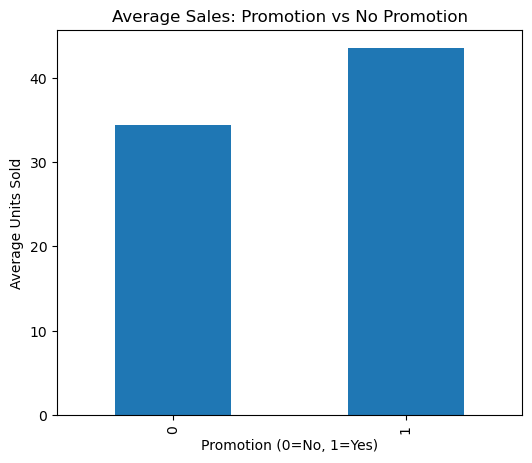

In [11]:
promo_sales = merged.groupby('promotion_flag')['units_sold'].mean()

plt.figure(figsize=(6,5))
promo_sales.plot(kind='bar')
plt.title("Average Sales: Promotion vs No Promotion")
plt.xlabel("Promotion (0=No, 1=Yes)")
plt.ylabel("Average Units Sold")
plt.show()